# Tutorial 4_Extension

By doing this extension, I want to achieve three things:

1) expand on my ability to code by automating some of the processes used in the Linear Discriminant Functions tutorial

2) Understand the concepts a bit better

# Libraries


In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 Linear Discriminant Functions

In [155]:
def LDF(X, w, w_0):
    """
    Computes the discriminant function g(X) = w . X + w_0
    """
    return np.matmul(w, X) + w_0


def create_grid(*x):
    """
    Creates a grid of points to plot based on n x coordinates
    """
    p = 1
    for i in x:
        p *= len(i)
    grid = [*np.meshgrid(*x)]
    Xgrid = np.array(grid).reshape(len(grid),p)
    return Xgrid

def reshape_by_component(f, *x):
    """
    reshapes a function f by the dimensions of it's consituent components *x
    """
    return f.reshape(*[len(i) for i in x])
    

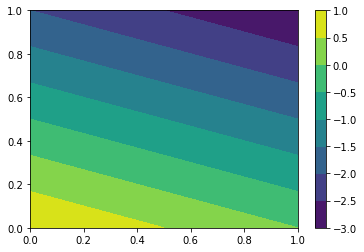

In [156]:
# text function

x1 = np.linspace(0,1,200)
x2 = np.linspace(0,1,200)

Xgrid = create_grid(x1,x2)

w = [-1,-3]

g = LDF(Xgrid, w, 1)

g = reshape_by_component(g, x1,x2)

plt.contourf(x1, x2, g)
plt.colorbar()

# this result is equivalent to that of exercise two from the tutorial
# looks like the functions are working well!

In [157]:
def generalised_LDF(X, W, w_0):
    """
    given coodinates X, a weight matrix W and a bias value of w_0, computes the relevant
    classes for each input
    """
    gs = []
    for w in W:
        gs.append(LDF(X, w, w_0))
    # define classes array
    Y = np.zeros([1, X.shape[1]])
    for i in range(len(gs)):
        Y_temp = np.ones([1, X.shape[1]])
        for j in range(len(gs)):
            Y_temp[0, gs[i] < gs[j]] = 0
            
        Y[Y_temp == 1] = i + 1
    
    return Y

(2, 40000)
(1, 40000)


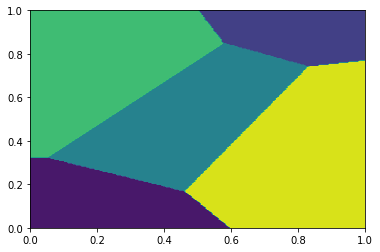

In [290]:
W = np.array([
    [1.3, -1, -3],
    [-2, 1, 2],
    [0.3, 0.1, -0.1],
    [0, -1, 1],
    [-0.2, 1.5, -1],
])

# NOTE: Xgrid needs to change!

Xgrid = create_grid(x1,x2)
print(Xgrid.shape)
print(np.ones([1,Xgrid.shape[1]]).shape)
Ygrid = np.concatenate([np.ones([1,Xgrid.shape[1]]), Xgrid])

Y = generalised_LDF(Ygrid, W, 1)

Y = reshape_by_component(Y,x1,x2)

plt.contourf(x1,x2,Y)

# Higher order functions

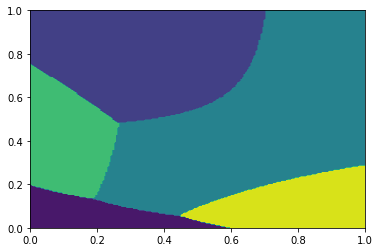

In [159]:
W = np.array([
    [1.3, -1, -3, -10],
    [-1, 1.5, 3, -1],
    [0.4, -0.1, -0.1, 3],
    [0.5, -1, 1, -0.1],
    [-0.2, 1.5, -1, 0.4],
])

Xgrid = create_grid(x1,x2)#
Ygrid = np.concatenate([
    np.ones([1,Xgrid.shape[1]]),
    Xgrid,
    (Xgrid[0,:] * Xgrid[1,:]).reshape(1,-1)
])


Y = generalised_LDF(Ygrid, W, 1)

Y = reshape_by_component(Y,x1,x2)

plt.contourf(x1,x2,Y)


# this is also correct, now let's try to design a class that will do all of this for us

# Creating a class...

In [338]:
class GeneralLDF:
    """
    //explanation of what class does
    
    
    Dependencies:
    -------------
    
    Attributes:
    -----------
    
    Methods:
    --------
    
    
    """
    def __init__(self, W,*x, **kwargs):
        self.W = W
        self.x = x
        self.Xgrid = self.create_grid(*kwargs.values())

    
    def create_grid(self, *features):
        p = 1
        for x in self.x:
            p *= len(x)
            
        grid = [*np.meshgrid(*self.x)]
        Xgrid = np.array(grid).reshape(len(grid),p)
        Xgrid = np.concatenate([
            np.ones([1, Xgrid.shape[1]]), Xgrid
        ])
        for feature in features:
            new_feature = np.ones([1,Xgrid.shape[1]])
            for i, power in enumerate(feature):
                new_feature *= Xgrid[i+1,:] ** power
            Xgrid = np.concatenate([
                Xgrid, new_feature.reshape(1,-1)   
            ])
        
        return Xgrid        

    def reshape_by_component(self, f):
        """
        reshapes a function f by the dimensions of it's consituent components *x
        """
        return f.reshape(*[len(i) for i in self.x])
    
    def calculate_g(self):
        """
        given coodinates X, a weight matrix W and a bias value of w_0, computes the relevant
        classes for each input
        """
        gs = []
        for w in self.W:
            gs.append(np.matmul(w, self.Xgrid))
        # define classes array
        Y = np.zeros([1, self.Xgrid.shape[1]])
        for i in range(len(gs)):
            Y_temp = np.ones([1, self.Xgrid.shape[1]])
            for j in range(len(gs)):
                Y_temp[0, gs[i] < gs[j]] = 0
            
            Y[Y_temp == 1] = i + 1
    
        return Y
    
    def plot(self, Y, **kwargs):
        Y = reshape_by_component(Y,*self.x)
        ax, fig = plt.subplots(figsize = (10,8))
        plt.contourf(self.x[0],self.x[1],Y,
                     cmap=plt.cm.get_cmap(
                         'Set1' if 'cmap' not in kwargs else kwargs['cmap'],
                         len(np.unique(Y))+1))
        plt.colorbar(ticks= range(len(np.unique(Y))+1), label= 'classes')
        plt.clim(-0.5, 5.5)
        plt.title('a contour plot of the generalised linear discriminant function')
        plt.xlabel('x1')
        plt.ylabel('x2')

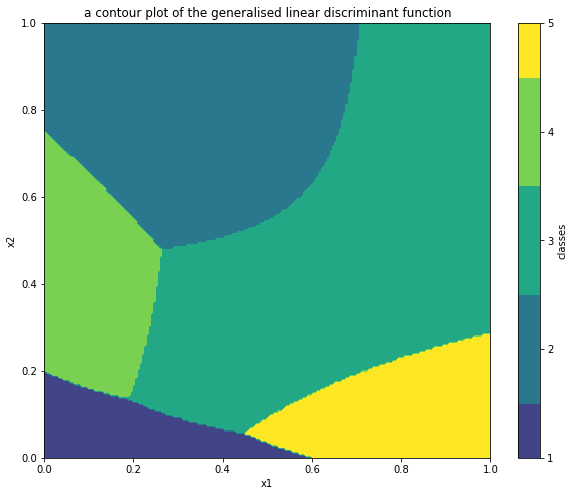

In [339]:
        
x1 = np.linspace(0,1,200)
x2 = np.linspace(0,1,200)

W = np.array([
    [1.3, -1, -3, -10],
    [-1, 1.5, 3, -1],
    [0.4, -0.1, -0.1, 3],
    [0.5, -1, 1, -0.1],
    [-0.2, 1.5, -1, 0.4],
])
model = GeneralLDF(W, x1, x2, feat1 = [1,1])
Y = model.calculate_g()
model.plot(Y, cmap = 'viridis')